In [1]:
# %matplotlib qt
# %matplotlib ipympl

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import cv2
import easyocr

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.widgets import  Slider

In [2]:
VIDEO_PATH = "Videos/Start1.avi"

In [3]:
CAP = cv2.VideoCapture(VIDEO_PATH)
FPS = int(CAP.get(cv2.CAP_PROP_FPS))
LENTH = int(CAP.get(cv2.CAP_PROP_FRAME_COUNT) / FPS)
CAP.set(cv2.CAP_PROP_POS_FRAMES, 0)
_, START_FRAME = CAP.read()

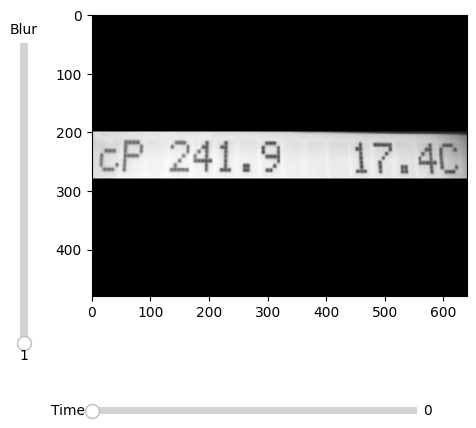

In [6]:
# Preprocess
def image_process(frame, blur=1):
    frame = cv2.blur(frame, (BLUR, BLUR))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.bitwise_not(frame)
    return frame


BLUR = 1

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
fig.subplots_adjust(left=0.25, right=1, bottom=0.25, top=1, hspace=0, wspace=0)

PLOT = ax.imshow(image_process(START_FRAME), cmap='binary')

ax_time_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
TIME_slider = Slider(
    ax=ax_time_slider,
    label='Time',
    valmin=0,
    valmax=LENTH,
    valinit=0,
    valstep=1,
)

ax_blur_slider = fig.add_axes([0.1, 0.25, 0.03, 0.6])
BLUR_slider = Slider(
    ax=ax_blur_slider,
    orientation='vertical',
    label='Blur',
    valmin=BLUR,
    valmax=20,
    valinit=1,
    valstep=1,
)


def update(val):
    time = TIME_slider.val
    global BLUR
    BLUR = BLUR_slider.val

    CAP.set(cv2.CAP_PROP_POS_FRAMES, int(FPS * time))
    _, frame = CAP.read()
    frame = image_process(frame, blur=BLUR)

    PLOT.set_data(frame)
    PLOT.autoscale()

    fig.canvas.draw_idle()


TIME_slider.on_changed(update)
BLUR_slider.on_changed(update)
plt.show()

In [7]:
# input('Continue to selection?')
print(f'Blur value= {BLUR}')

Blur value= 1


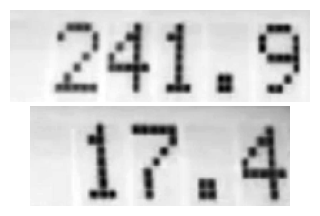

In [13]:
# Selection
def strict(image, x, y, w, h):
    return image[y:y + h, x:x + w]


SLICE_CORDS = []
values_to_recognize = int(input('Valaues to recognize: '))

for i in range(values_to_recognize):
    roi_frame = image_process(START_FRAME, blur=BLUR)
    roi_frame = cv2.bitwise_not(roi_frame)
    current_slice = cv2.selectROI(
        f'Select {len(SLICE_CORDS)+1}',
        roi_frame,
        fromCenter=False,
        showCrosshair=True,
    )
    SLICE_CORDS.append(current_slice)
cv2.destroyAllWindows()

fig, axes = plt.subplots(nrows=values_to_recognize)
if not isinstance(axes, np.ndarray): axes = [axes]
fig.set_size_inches(3, 1 * values_to_recognize)
fig.subplots_adjust(left=0, right=1, bottom=0.0, top=1, hspace=0, wspace=0)
start_slices = [
    strict(image_process(START_FRAME, blur=BLUR), *params)
    for params in SLICE_CORDS
]
for i in range(values_to_recognize):
    axes[i].set_axis_off()
    axes[i].imshow(start_slices[i], cmap='binary')

In [14]:
# Recognize
def correct(values):
    return values


reader = easyocr.Reader(['en'])
# TODO: add input
frames_per_sec = 1
diap = tqdm(iterable=range(0, FPS * LENTH, int(FPS / frames_per_sec)))

data = []
for i_frame in diap:
    CAP.set(cv2.CAP_PROP_POS_FRAMES, i_frame)
    _, frame = CAP.read()
    i_text = []
    for select_window in SLICE_CORDS:
        selection = strict(frame, *select_window)
        selection = image_process(selection, blur=BLUR)
        values = [
            (value, round(confidence,3)) for _, value, confidence
            in reader.readtext(selection)
            ] #yapf:disable

        i_text.append(values)

    data.append(i_text)


100%|██████████| 54/54 [00:07<00:00,  7.35it/s]


In [15]:
data

[[[('241.9', 0.987)], [('17.4', 0.918)]],
 [[('241.4', 0.852)], [('17.4', 0.981)]],
 [[('240.9', 0.903)], [('17.4', 0.974)]],
 [[('240.4', 0.863)], [('17.4', 0.952)]],
 [[('239.9', 0.734)], [('17.4', 0.969)]],
 [[('239.4', 0.554)], [('17.4', 0.965)]],
 [[('239.9', 0.811)], [('17.4', 0.983)]],
 [[('240.4', 0.912)], [('17.4', 0.983)]],
 [[('240.4', 0.864)], [('17.4', 0.981)]],
 [[('240.9', 0.969)], [('17.4', 0.99)]],
 [[('241.4', 0.996)], [('17.4', 0.99)]],
 [[('241.4', 0.993)], [('17.4', 0.962)]],
 [[('240.4', 0.916)], [('17.4', 0.983)]],
 [[('240.4', 0.943)], [('17.4', 0.982)]],
 [[('239.9', 0.866)], [('17.4', 0.986)]],
 [[('239.4', 0.848)], [('17.4', 0.991)]],
 [[('239.9', 0.678)], [('17.4', 0.977)]],
 [[('240.4', 0.948)], [('17.4', 0.968)]],
 [[('240.4', 0.886)], [('17.4', 0.965)]],
 [[('240.9', 0.586)], [('17.4', 0.931)]],
 [[('241.4', 0.992)], [('17.4', 0.967)]],
 [[('241.4', 0.942)], [('17.4', 0.978)]],
 [[('240.4', 0.944)], [('17.4', 0.982)]],
 [[('239.9', 0.555)], [('17.4', 0.90

## tests

In [75]:
a= [one for one,two in data][29]
a

[('240.$', 0.409)]

In [11]:
diap1 = tqdm(iterable=range(FPS*45, FPS * 46-1, 1))
data1 = []
for i_frame in diap1:
    CAP.set(cv2.CAP_PROP_POS_FRAMES, i_frame)
    _, frame = CAP.read()
    i_text1 = []
    for select_window in SLICE_CORDS:
        selection = strict(frame, *select_window)
        selection = image_process(selection, blur=BLUR)
        selection =cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
        selection =cv2.bitwise_not(selection)
        values = [
            (value, confidence) for _, value, confidence
            in reader.readtext(selection)
            ] #yapf:disable
        
        i_text1.append(values)

    data1.append(i_text1)

100%|██████████| 29/29 [00:04<00:00,  7.14it/s]


In [12]:
a_val = [value for value,confidence in  a]
a_val

['238', '9']

In [13]:
a_add = [one for one,two in data1]
a_add

[[('238', 0.9999589801055311), ('9', 0.9999982118614561)],
 [('238', 0.9999582230290607), ('9', 0.9999983310706426)],
 [('238', 0.9999591865809455), ('9', 0.9999983310706426)],
 [('238', 0.999901717811072), ('9', 0.9999980926522767)],
 [('238', 0.9999002036698248), ('9', 0.9999980926522767)],
 [('238', 0.9999582230290607), ('9', 0.9999965429335909)],
 [('238', 0.9999578789034177), ('9', 0.9999965429335909)],
 [('238', 0.9919066429138184), ('9', 0.9999963045154381)],
 [('238', 0.9970549941062927), ('9', 0.9999964237245109)],
 [('238', 0.9999230534703971), ('9', 0.9999971389790971)],
 [('238', 0.9999240858425567), ('9', 0.9999971389790971)],
 [('238', 0.9999048149191253), ('9', 0.9999995231628986)],
 [('238', 0.730877697467804), ('9', 0.9999995231628986)],
 [('238', 0.9999115597366662), ('9', 0.9999995231628986)],
 [('238', 0.9999375066936251), ('9', 0.9999976158156301)],
 [('238', 0.999939984391846), ('9', 0.9999976158156301)],
 [('238', 0.9999384014178877), ('9', 0.9999976158156301)],


In [14]:
CAP.set(cv2.CAP_PROP_POS_FRAMES, FPS * 45)
_, frame = CAP.read()
select_window = SLICE_CORDS[0]
selection = strict(frame, *select_window)
image_process(selection, blur=BLUR)
[(value, confidence) for _, value, confidence in reader.readtext(selection)]

[('238', 0.9999589801055311), ('9', 0.9999982118614561)]

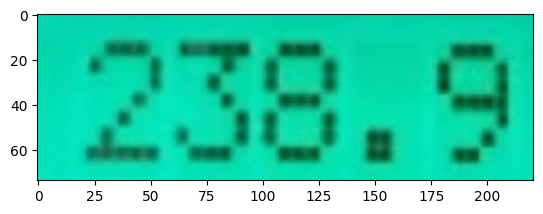

In [15]:
# %matplotlib inline
plt.imshow(selection)

In [32]:
import re

In [41]:
if len(a_val) == 1:
    pattern_founds = re.findall(r'\d{1,3}\.\d{1}', a_val)
    one_value = len(pattern_founds) == 1
    if one_value: len_value = len(pattern_founds[0])

['28.5']

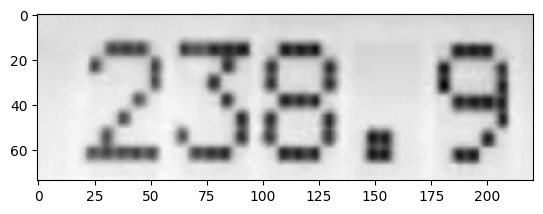

In [62]:
plt.imshow(selection,cmap='binary')

In [63]:
reader.readtext(selection2)

[([[13, 7], [217, 7], [217, 74], [13, 74]], '238.9', 0.9785211773917385)]